## Goals of the presentation:
1. A brief introduction to R, specifically the dplyr and ggplot2 packages, and Jupyter Notebooks
2. Run through an example analysis 

This presentation is available in my Github at https://github.com/andymd26/presentations

## About me (and a little soap box speech)
1. About me
2. What is your background? All mechanical and civil engineers? Software knowledge? Statistics coursework?
3. How many of you have a personal webpage? github? Know what github is?
4. Soapbox portion: Build a personal website to market yourself. I built mine with square space but many other options exist (www.andrewblohm.com).
5. Soapbox cont'd: If you have any interest in doing datascience or computer science work start a github account (https://github.com/andymd26). Usually, one of the first questions you'll get in an interview process if not on the application form itself (great way to demonstrate your coding abilities).

## What is Jupyter notebook?
1. Short answer, this. I find it a useful place to sketch out certain types of projects and presentations.
2. The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more.

## What is R?
"R is an open source programming language and software environment for statistical computing and graphics that is supported by the R Foundation for Statistical Computing. The R language is widely used among statisticians and data miners for developing statistical software and data analysis" (Wikipedia, 2017).

## Advantages of using R
1. R is a programming language and environment developed for statistical analysis by practising statisticians and researchers. 
2. The graphical capabilities of R are outstanding, providing a fully programmable graphics language that surpasses most other statistical and graphical packages.  
3. The validity of the R software is ensured through openly validated and comprehensive governance as documented for the US Food and Drug Administration (R Foundation for Statistical Computing, 2008). Because R is open source, unlike closed source software, it has been reviewed by many internationally renowned statisticians and computational scientists.
4. R is free and open source software, allowing anyone to use and, importantly, to modify it. 
5. R has no license restrictions (other than ensuring our freedom to use it at our own discretion), and so we can run it anywhere and at any time, and even sell it under the conditions of the license.
6. Anyone is welcome to provide bug xes, code enhancements, and new packages, and the wealth of quality packages available for R is a testament to this approach to software development and sharing.
7. Over 4800 packages available from multiple repositories specializing in topics like econometrics, data mining, spatial analysis, and bio-informatics.
8. R is cross-platform.
9. R plays well with many other tools, importing data, for example, from CSV les, SAS, and SPSS, or directly from Microsoft Excel, Microsoft Access, Oracle, MySQL, and SQLite. It can also produce graphics output in PDF, JPG, PNG, and SVG formats, and table output for LATEX and HTML.
10. R has very active user groups where questions can be asked and are often quickly responded to, often by the very people who developed the environment|this support is second to none (See Stackoverflow).
11. New books for R (the Springer Use R! series) are emerging, and there is now a very good library of books for using R.

(Source: http://analyticstrainings.com/?p=101)

Loading required package: IRdisplay
Warning message:
"package 'IRdisplay' was built under R version 3.3.3"

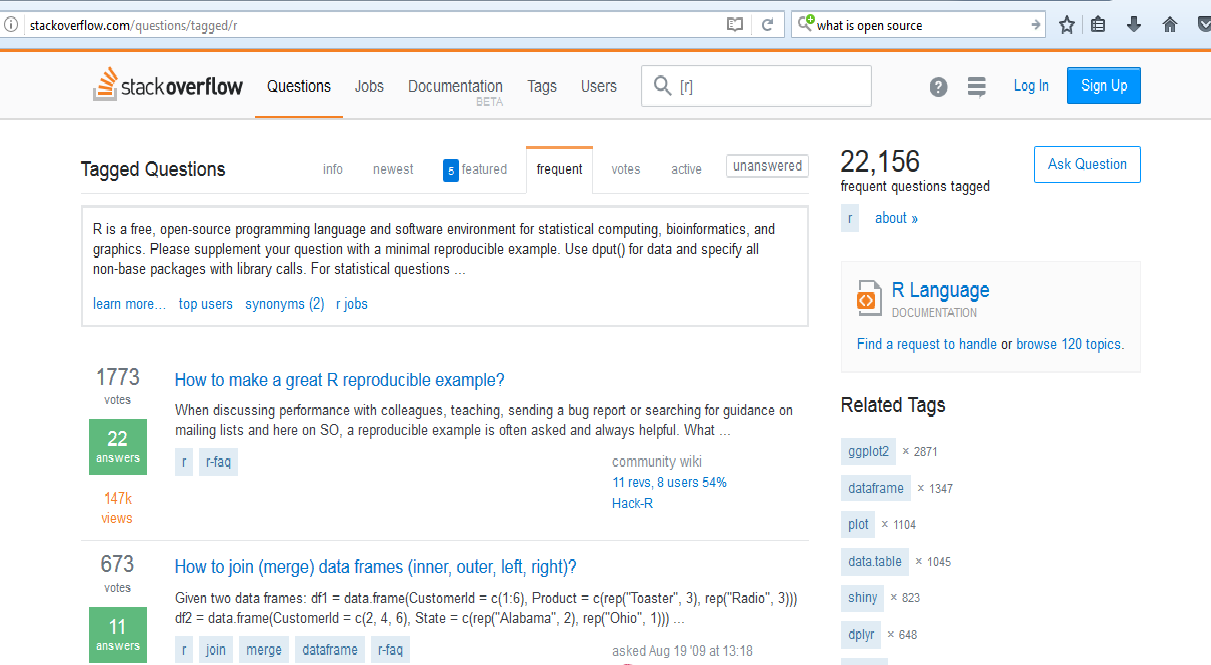

In [1]:
require("IRdisplay")
display_png(file="stackoverflow.png")  

## Job Announcements by software
(Source: Muenchen, 2017)

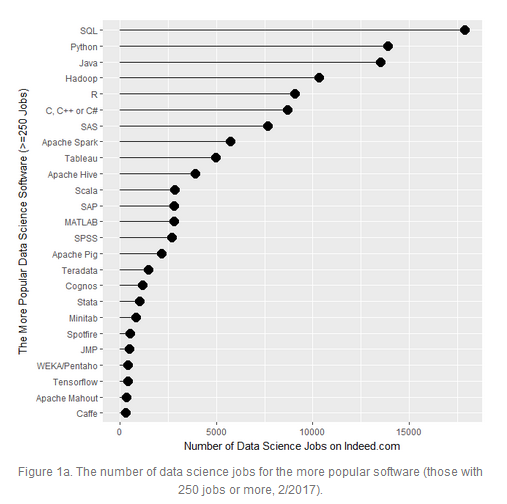

In [2]:
display_png(file="R_jobs.png")  

## R vs Python
(Source: Muenchen, 2017)

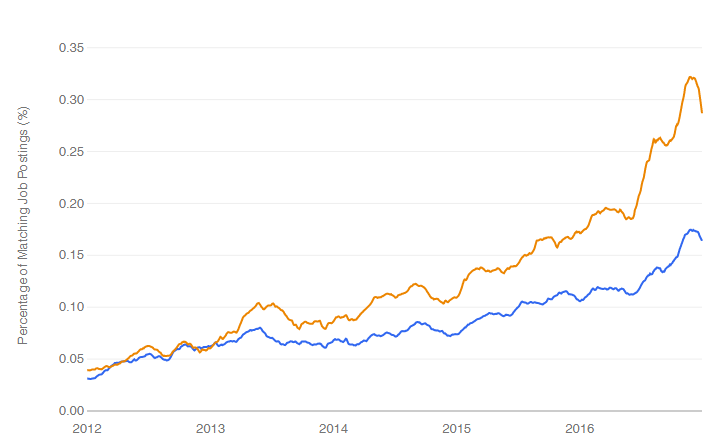

In [3]:
display_png(file="R_Python.png")  

## Trends in Academia Software use (Journal articles)
(Source: Muenchen, 2017)

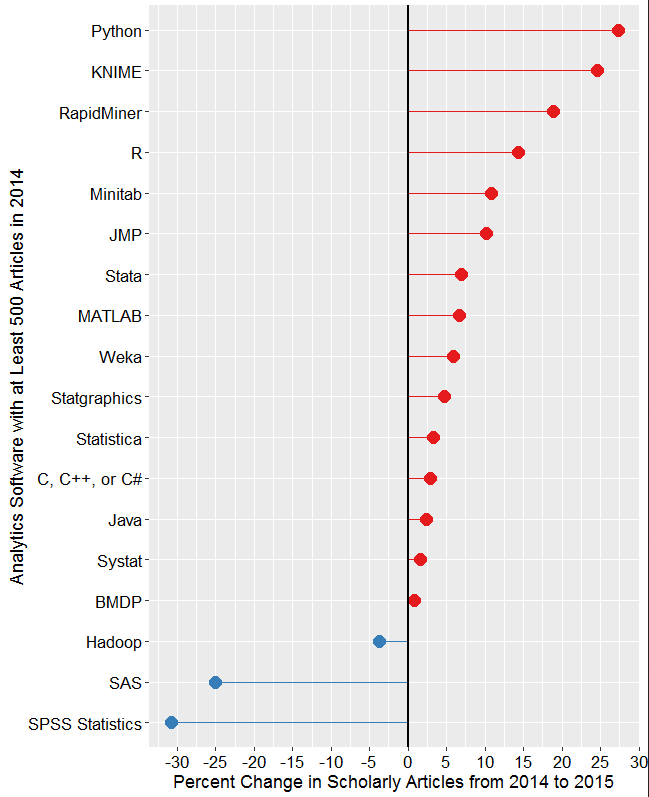

In [4]:
display_png(file="Academia_Software.png")  

## Disadvantages of R
1. R has a steep learning curve but no steeper than for other statistical languages.  
2. Documentation is sometimes patchy and terse, and impenetrable to the non-statistician. However, some very high-standard books are increasingly plugging the documentation gaps. [Academics has really stepped into the gap]
3. The quality of some packages is less than perfect, although if a package is useful to many people, it will quickly evolve into a very robust product through collaborative efforts.
4. There is, in general, no one to complain to if something doesn’t work. R is a software application that many people freely devote their own time to developing. Problems are usually dealt with quickly on the open mailing lists, and bugs disappear with lightning speed. 
5. Many R commands give little thought to memory management, and so R can very quickly consume all available memory. This can be a restriction when doing data mining. There are various solutions, including using 64 bit operating systems that can access much more memory than 32 bit ones.

(Source: http://analyticstrainings.com/?p=101)

## Disk Drive Case Study
The first part of any R code is installing and loading the packages that are needed for the analysis.

In [ ]:
install.packages("ggplot2", repos='http://cran.us.r-project.org')
# ggplot is a graphics creation package 
install.packages("dplyr", repos='https://cran.rstudio.com')

In [4]:
require(ggplot2)
require(dplyr)

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



You are the manager of a disk drive factory producing a small but key part of the assembly. The part should be 4 mm with a tolerance of +/- 0.005mm. Beyond that tolerance the part is unacceptable and would have to be thrown away. You can run the machines that produce this key part at a variable speed (not just fast or slow) parameterized by a key value r for rate expressed in parts/day. 

In [6]:
mu= 4
rate= 1000
sigma= 0.8*(10^-5)*rate

There is a target of producing 1000 parts/day. Clearly, you may not get all 1000 parts since some of them will be rejected if they don't have acceptable widths.

Vary the rate r from 500 to 1500 parts/day (minimum is 500 and maximum is 1500 for this type of machine). You should vary the number of simulation samples to show why your results are robust and don't depend on the number of sampled values. You need to try a wide range of sampled values.

In [11]:
n= 100000
data= data.frame(x= rnorm(n= n, mean= 10, sd = 1))
# R has built in normal distribution functions that can be used to generate the Density distribution function, 
# quantile function or be used to generate random numbers for the normal distribution with mean equal to mean 
# and standard deviation. 

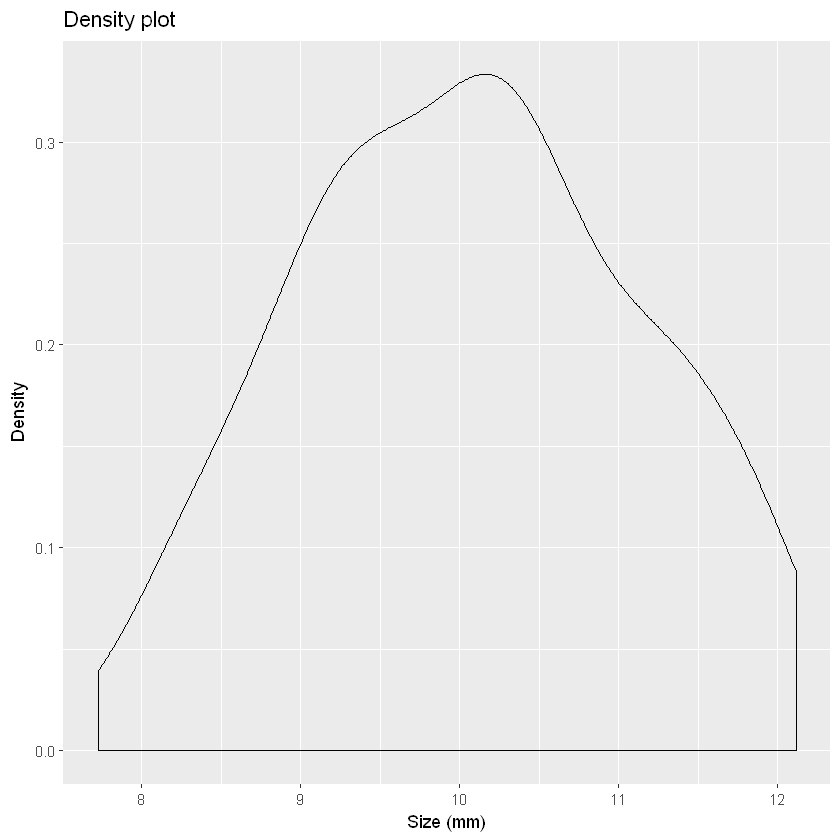

In [7]:
ggplot(data= data, aes(x=x)) + geom_density() + labs(x="Size (mm)", y="Density", title= "Density plot")

We could use the above code to walk through several values of the rate. Another approach would be to sample from the available production rates, which are between 500 and 1500 units per day. 


## Vectorization vs. loops
From the Wikipedia page on Vectorization, "In computer science, array programming languages (also known as vector or multidimensional languages) generalize operations on scalars to apply transparently to vectors, 
matrices, and higher-dimensional arrays". In these languages, an operation that operates on entire arrays can be called a vectorized operation,[2] regardless of whether it is executed on a vector processor or not.

R and Matlab are interpreted languages. The reason loops are slow in an interpreted language is that each function call comes with a bit of an overhead. Thus, when you call a function once with an array of a million elements, you're much faster than calling it a million times with a scalar. 

In [12]:
k = 10
# Number of rate values to try
r = round(runif(n= k, min= 500, max= 1500))
# Choose 'k' production rates
# r = round(runif(n, min= 500, max= 1500))
# We could use the code above to explore the entire range of values but it would be overkill here

data= data.frame(rate = r[round(runif(n, min= 1, max= length(r)))])
# The variable that we need to sample is the rate of production. This code samples from the length of the index 
# (i.e., number of rates) 'n' times. From this we can generate the additional information that we need.
sort(r)

[1]  631  728  835  916 1026 1032 1040 1195 1205 1277

There is something wrong with the code above, can anyone identify what the issue is? Specifically, this line:

    round(runif(n, min=1, max= length(r)))

In [ ]:
hist(round(runif(n, min=1, max= length(r))))

What is going on here? 

In [13]:
# The short answer is rounding with our bounds creating different probabilities of occurrence in a case when we 
# want them to be the same. A slight change to the code fixes the problem.

data= data.frame(rate = r[round(runif(n, min= 0.5, max= length(r)+0.5))])
table(data)

data
  631   728   835   916  1026  1032  1040  1195  1205  1277 
10005  9909 10090  9921  9898  9980 10154 10043 10177  9823 

## DPLYR Package
The dplyr package is a very useful package in R for data cleaning and exploration:
1. It simplifies how you can think about common data manipulation tasks.
2. It provides simple “verbs”, functions that correspond to the most common data manipulation tasks, to help you translate those thoughts into code.
3. It uses efficient data storage backends, so you spend less time waiting for the computer.

In [ ]:
data.1 = data %>%
  # Pipe operators, dplyr has a number of verbs (mutate, select, filter, arrange, ...) 
  mutate(sigma= 0.8*(10^-5)*rate) %>%
  # Generate the standard deviation value given the sampled rate
  mutate(mu = mu) %>%
  # Mean value (same for all entries)
  mutate(x = rnorm(n= n, mean= mu, sd= sigma)) %>%
  # Sample from the normal distribution using the parameter values we generated (this is a vectorized 
  # implementation) %>%
  group_by(rate) %>%
  mutate(p_reject = sum(x>= (mu + 0.005) | x<= (mu - 0.005))/length(x)) %>%
  mutate(pass = sum(x <= mu + 0.005 & x >= mu-0.005)) %>%
  mutate(pass_perc = pass/n) 
head(data.1)
table(data.1$rate)

In [ ]:
ggplot(data=data.1, aes(x=x)) + geom_density(aes(group=rate, color=rate)) + labs(x="Size (mm)", y="Density", title= "Density plot")

In [ ]:
ggplot(data=data.1, aes(x=x)) + geom_density() + facet_wrap(~rate) + labs(x="Size (mm)", y="Density", title= "Density plot")

In [ ]:
ggplot(data= data.1, aes(rate)) + 
geom_line(aes(y=pass_perc), color= "blue") +
geom_line(aes(y=p_reject), color= "red") + 
labs(x="Production Rate", y="Percentage", title= "Acceptance and rejection rates versus production speed")

In [ ]:
% Disk drive example
clear
hold off
tic
n=120000;
u=rand(n,12);
mean=4.0;
sigma_low=0.0019;
sigma_high=0.0026;
for i=1:1:n
z(i)=sum(u(i,1:12))-6;
% use the same z-value for both low and high
    low(i)=mean+sigma_low*z(i);
    if (low(i)>4.005)      low_cost(i)=31.15;
    elseif (low(i)<3.995)  low_cost(i)=31.15;
    else                   low_cost(i)=20.75;
    end
    
    high(i)=mean+sigma_high*z(i);
    if (high(i)>4.005)     high_cost(i)=30.85;
    elseif (high(i)<3.995) high_cost(i)=30.85;
    else                   high_cost(i)=20.45;
    end
end
p_low_defective_cost  =sum(low_cost>20.75)/n
p_low_ok_cost         =sum(low_cost==20.75)/n
exp_cost_low          =p_low_defective_cost*31.15+p_low_ok_cost*20.75

p_high_defective_cost =sum(high_cost>20.45)/n
p_high_ok_cost        =sum(high_cost==20.45)/n
exp_cost_high         =p_high_defective_cost*30.85+p_high_ok_cost*20.45

disp(['Low speed:  P(Defective|low speed)=',num2str(p_low_defective_cost)])
disp(['Low speed:  P(Not Defective|low speed)=',num2str(p_low_ok_cost)])
disp(['High speed: P(Defective|high speed)=',num2str(p_high_defective_cost)])
disp(['High speed: P(Not Defective|high speed)=',num2str(p_high_ok_cost)])

disp(['Expected cost, Low speed: =$',num2str(exp_cost_low)])
disp(['Expected cost, High speed:=$',num2str(exp_cost_high)])
% Plotting
subplot(2,1,1)
hist(low_cost,100)
%axis([3.97 4.03 0 2000])
title 'low'
grid on

subplot(2,1,2)
hist(high_cost,100)
%axis([3.97 4.03 0 2000])
title ('high')
grid on

toc